In [1]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read in data and display fist 5 rows
df = pd.read_csv('TIME SERIES + VISITOR ATTENTION INDEX + ECONOMIC INDEX - DATA COMPOSITION 4 (Fixed Test Set).csv')
df.head(5)

,Month,Tourist Arrival,Airbnb Vietnam,Vietnam restaurant,Shopping in Hanoi,Shopping in Ho Chi Minh,Vietnam tour,Skyscanner,Vietnam visa,Vietnam airport,...,Sgn airport,Phu Quoc,Vietnam itinerary,Vietnam trip,Things to do in Hue,Vietnam backpackers,CCI,PMI,REERI,Class
0,01/01/2008,399556,11,59,32,8,58,7,69,52,...,18,20,0,32,0,8,98,53,109,Train
1,01/02/2008,411032,0,51,0,0,46,6,61,35,...,10,19,5,39,7,5,91,53,108,Train
2,01/03/2008,414332,0,57,7,24,58,6,61,51,...,38,28,6,30,0,0,90,53,106,Train
3,01/04/2008,395900,0,51,6,9,58,6,66,43,...,25,22,8,45,0,8,83,56,106,Train
4,01/05/2008,366387,0,57,0,7,57,6,63,46,...,16,22,5,47,0,9,80,57,106,Train


In [3]:
import datetime
df['Month'] = pd.to_datetime(df['Month'])
df['Month'] = df['Month'].dt.strftime('%d.%m.%Y')
df['Month'] = pd.DatetimeIndex(df['Month']).dayofyear

In [4]:
x=df.drop('Tourist Arrival', axis=1)
y=df['Tourist Arrival']

In [5]:
train = df[df["Class"] == "Train"]
validation = df[df["Class"] == "Validation"]
test = df[df["Class"] == "Test"]
print(train.shape)
print(validation.shape)
print(test.shape)

(133, 25)
(12, 25)
(41, 25)


In [6]:
train = train.drop(['Class'], axis=1)
validation = validation.drop(['Class'], axis=1)
test = test.drop(['Class'], axis=1)

In [7]:
target_column_train = ['Tourist Arrival']
predictors_train = list(set(list(train.columns))-set(target_column_train))

x_train = train[predictors_train].values
y_train = train[target_column_train].values


print(x_train.shape)
print(y_train.shape)

(133, 23)
(133, 1)


In [8]:
target_column_validation = ['Tourist Arrival'] 
predictors_validation = list(set(list(validation.columns))-set(target_column_validation))

x_validation = validation[predictors_validation].values
y_validation = validation[target_column_validation].values

print(x_validation.shape)
print(y_validation.shape)

(12, 23)
(12, 1)


In [9]:
target_column_test = ['Tourist Arrival'] 
predictors_test = list(set(list(test.columns))-set(target_column_test))

x_test = test[predictors_test].values
y_test = test[target_column_test].values

print(x_test.shape)
print(y_test.shape)

(41, 23)
(41, 1)


In [10]:
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(solver='adam',
                  hidden_layer_sizes=50,
                  max_iter=10000,
                  learning_rate='constant',
                  shuffle=False,
                  random_state=9876,
                  activation='identity')
nn.fit(x_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(activation='identity', hidden_layer_sizes=50, max_iter=10000,
             random_state=9876, shuffle=False)

In [11]:
params = {'solver': ['lbfgs', 'sgd', 'adam'],
          'hidden_layer_sizes': [10,20,30,40,50],
          'learning_rate': ['constant', 'invscaling', 'adaptive'],
          'shuffle': [True, False],
          'activation': ['identity', 'logistic', 'tanh', 'relu']}

In [75]:
from sklearn.model_selection import GridSearchCV
gs=GridSearchCV(estimator=nn, param_grid=params, cv=10)

In [ ]:
gs=gs.fit(x_train, y_train)

In [ ]:
best_params=gs.best_params_

In [12]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error

In [13]:
y_pred=nn.predict(x_test)
print(y_pred)

[1099723.58147694  988223.83508997 1063247.82399967 1089949.94437283
 1129685.59136753 1088210.0565216  1173081.47571402 1130272.67089374
 1142384.64014517 1392640.54519502  935315.41899569  516950.16809109
  112614.69339836  140875.58767032  129219.89038869  126614.35758655
  120115.19247474   98420.95953742  101912.32865291   85640.90923533
   93890.92513495  104689.96833743   52769.41818921  242708.47166988
  294825.54257628  399501.11901664  537149.76434156  588942.14483546
  719639.14588967  806781.18297077  798084.67544542  847969.82508416
  857057.68927741  932850.70807661  925231.63017012 1158937.85127024
 1148229.94862035 1087644.65216258 1118885.57214674 1089191.38741737
 1055955.3665506 ]


In [14]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", RMSE)

Root Mean Squared Error: 323304.4846268114


In [15]:
MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 276524.0851816266


In [16]:
MAPE = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error:", MAPE)

Mean Absolute Percentage Error: 1.1086597365118622e+20


In [17]:
def SMAPE(y_test,y_pred):
    return 100/len(y_test) * np.sum(2 * np.abs(y_pred - y_test) / (np.abs(y_test) + np.abs(y_pred)))
result = SMAPE(y_test,y_pred)
print("SMAPE :", result)

SMAPE : 4995.448399252553


In [18]:
def RMSPE(y_test, y_pred):
    return np.sqrt(np.nanmean(np.square(((y_test - y_pred) / y_test))))*100
result1 = RMSPE(y_test,y_pred)
print("RMSPE :", result1)

RMSPE : inf


/var/folders/w4/3f8pkphx2j78qktgvt5lpdvw0000gn/T/ipykernel_5007/2542154612.py:2: RuntimeWarning: divide by zero encountered in divide
  return np.sqrt(np.nanmean(np.square(((y_test - y_pred) / y_test))))*100


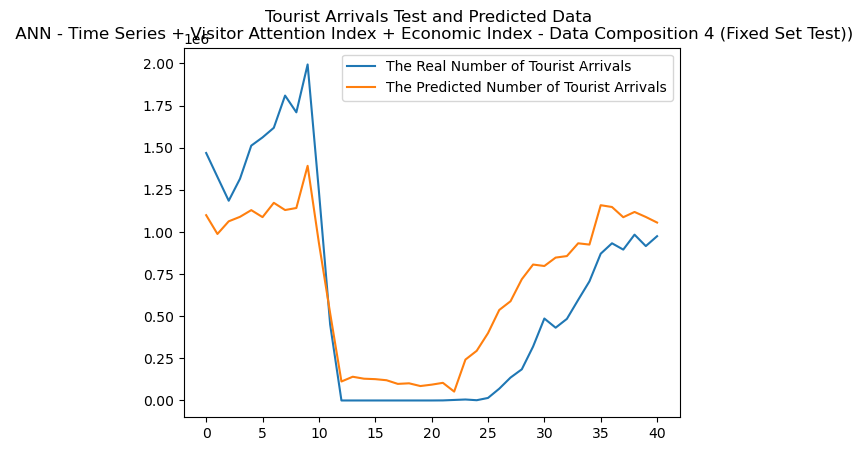

In [19]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="The Real Number of Tourist Arrivals")
plt.plot(x_ax, y_pred, label="The Predicted Number of Tourist Arrivals")
plt.title("Tourist Arrivals Test and Predicted Data \n ANN - Time Series + Visitor Attention Index + Economic Index - Data Composition 4 (Fixed Set Test))")
plt.legend()
plt.show()